# Chapter 3 testrun

Here, I will run explore setting up DOE run-through in Python based on the DOE simplified book, chapter 3.

In [8]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import math

In [14]:
# df = pd.read_csv('TypingDOE.xlsx', index_col=0)
df = pd.read_excel('TypingDOE.xlsx', index_col=0)

df['Fingers'] = df['Fingers'].astype('category')
df['Dist'] = df['Dist'].astype('category')
df['Burp'] = df['Burp'].astype('category')
df['Time'] = df['Time'].astype('category')

def get_high_low(x, low_category):
    if x == low_category:
        return '-'
    else:
        return '+'

factor_df = pd.DataFrame(index=df.index)
factor_df['j_wpm'] = df['J_wpm']
factor_df['e_wpm'] = df['E_wpm']
factor_df['j_epm'] = df['J_epm']
factor_df['e_epm'] = df['E_epm']
factor_df['A'] = df['Fingers'].apply(get_high_low, args=(0,))
factor_df['B'] = df['Dist'].apply(get_high_low, args=(0,))
factor_df['C'] = df['Burp'].apply(get_high_low, args=(0,))
factor_df['D'] = df['Time'].apply(get_high_low, args=(0,))

def calculate_interaction(data_df, cols):
    slices = data_df[cols].apply(tuple, axis=1)
    
    interaction = list()
    for tup in slices:
        int_tup = reduce(lambda a,b: '+' if a == b else '-', tup)
        interaction.append(int_tup)
    return interaction

# all_cols = list()
# l1_passed = set()

def get_combinations(letter_str):

    all_cols = list()
    for l1 in 'ABCD':
        all_cols.append(l1)
        for l2 in 'ABCD':
            if l2 > l1:
                factor_df[l1+l2] = calculate_interaction(factor_df, [l1, l2])
                all_cols.append(l1+l2)
                print('l1 {} l2 {}'.format(l1, l2))
            for l3 in 'ABCD':
                if l3 > l2 and l3 > l1 and l2 > l1:
                    all_cols.append(l1+l2+l3)
                    factor_df[l1+l2+l3] = calculate_interaction(factor_df, [l1, l2, l3])
    all_cols.append('ABCD')
    return all_cols

all_cols = get_combinations('ABCD')
factor_df['ABCD'] = calculate_interaction(factor_df, ['A', 'B', 'C', 'D'])                
factor_df = factor_df.iloc[0:-1]

print(factor_df)

l1 A l2 B
l1 A l2 C
l1 A l2 D
l1 B l2 C
l1 B l2 D
l1 C l2 D
      j_wpm  e_wpm  j_epm  e_epm  A  B  C  D AB ABC ABD AC ACD AD BC BCD BD  \
Run                                                                           
7.0   72.47  36.57   11.5   15.5  +  -  -  +  -   +   -  -   -  +  +   +  -   
1.0   62.92  40.77   12.5   21.0  +  +  +  +  +   +   +  +   +  +  +   +  +   
4.0   71.16  44.15    8.0   12.0  +  +  -  -  +   -   -  -   +  -  -   +  -   
13.0  57.69  25.99   11.0    7.5  -  -  +  +  +   +   +  -   -  -  -   -  -   
5.0   70.87  44.18   10.5   12.5  +  -  +  +  -   -   -  +   +  +  -   -  -   
8.0   76.13  44.94   17.0   22.0  +  -  -  -  -   +   +  -   +  -  +   -  +   
11.0  63.80  34.47    7.0    6.5  -  +  -  +  -   +   -  +   +  -  -   -  +   
14.0  60.10  31.59   13.0    8.0  -  -  +  -  +   +   -  -   +  +  -   +  +   
3.0   69.89  44.21   12.5    9.0  +  +  -  +  +   -   +  -   -  +  -   -  +   
15.0  60.89  40.41   15.5   18.0  -  -  -  +  +   -   +  +   +  -  +   

In [15]:
factor_effects = pd.DataFrame(columns=all_cols, index=['j_wpm', 'e_wpm', 'j_epm', 'e_epm'])

def get_factor_effect(factor_col, effect_col, data_df):
    
    combined = zip(data_df[factor_col], data_df[effect_col])
    summed = 0
    for elem in combined:
        level = elem[0]
        value = elem[1]
        if level == '+':
            summed += value
        else:
            summed -= value
    return summed

for factor in factor_effects.columns:
    for effect in factor_effects.index:
        factor_effects.ix[effect, factor] = get_factor_effect(factor, effect, factor_df) / 4

print(factor_effects)

             A      AB     ABC     ABD      AC     ACD      AD       B  \
j_wpm  17.7875 -2.1075 -1.0925 -5.0025  3.0825 -3.1025 -0.1375 -7.9575   
e_wpm  15.9525  0.0875 -7.2025 -0.2325  7.7225  0.5825 -1.7475  2.5125   
j_epm    4.375   4.125   5.875   1.625  -0.875   0.625  -3.125  -0.625   
e_epm    7.875   0.125  -2.375   1.125   0.875   2.875  -4.125  -1.625   

           BC     BCD      BD        C      CD       D    ABCD  
j_wpm -1.4225 -2.3275  4.5375 -12.3375  3.7875 -4.1075 -0.5275  
e_wpm  2.9525 -0.2775  1.8625  -5.1125  0.9775 -5.0025 -6.5225  
j_epm   5.625  -0.875  -2.125    1.375  -2.125   0.625  -9.625  
e_epm  17.375   1.375   2.375    3.125   2.125  -0.375  -1.375  


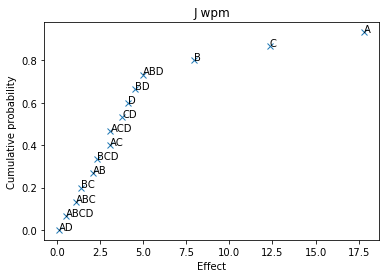

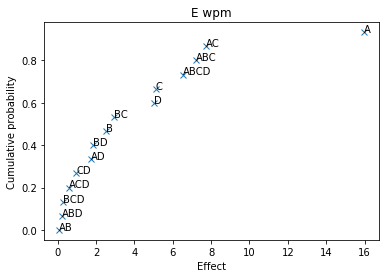

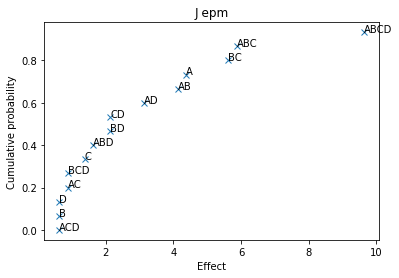

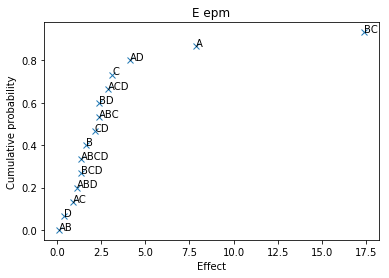

In [16]:
j_wpm_abs_effect = factor_effects.loc['j_wpm'].map(abs).sort_values()
e_wpm_abs_effect = factor_effects.loc['e_wpm'].map(abs).sort_values()
j_epm_abs_effect = factor_effects.loc['j_epm'].map(abs).sort_values()
e_epm_abs_effect = factor_effects.loc['e_epm'].map(abs).sort_values()

def add_labels(plt, effect, prob):
    for i in range(len(effect)):
        plt.annotate(effect.index[i],
                     xy = (effect[i], prob[i]))    

def annotate(plt, title):
    
    plt.xlabel('Effect')
    plt.ylabel('Cumulative probability')
    plt.title(title)
        
tot_c = len(j_wpm_abs_effect)
        
plt.figure()
cum_prob = np.arange(0, 1, 1 / tot_c)
plt.plot(j_wpm_abs_effect, cum_prob, 'x')
add_labels(plt, j_wpm_abs_effect, cum_prob)
annotate(plt, 'J wpm')
plt.show()

plt.figure()
cum_prob = np.arange(0, 1, 1 / tot_c)
plt.plot(e_wpm_abs_effect, cum_prob, 'x')
add_labels(plt, e_wpm_abs_effect, cum_prob)
annotate(plt, 'E wpm')
plt.show()

plt.figure()
cum_prob = np.arange(0, 1, 1 / tot_c)
plt.plot(j_epm_abs_effect, cum_prob, 'x')
add_labels(plt, j_epm_abs_effect, cum_prob)# print(b_series)

annotate(plt, 'J epm')
plt.show()

plt.figure()
cum_prob = np.arange(0, 1, 1 / tot_c)
plt.plot(e_epm_abs_effect, cum_prob, 'x')
add_labels(plt, e_epm_abs_effect, cum_prob)
annotate(plt, 'E epm')
plt.show()



# Getting into the statistics

Reference:
* A - Brand
* B - Time
* C - Power
* y1 - Taste
* y2 - Bullets

Steps below initially based on: http://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/

In [ ]:
print(df)

In [ ]:
print(factor_df)

In [60]:
# Let's use some more statistics-related packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

In [ ]:
# Working tooth example

# data = pd.read_csv('ToothGrowth.csv')
# dose_series = data['dose']
# print(dose_series.head())
# print(data.head())
# print(df.head())

# plt.figure()
# fig = interaction_plot(dose_series, data.supp, data.len,
#              colors=['red','blue'], markers=['D','^'], ms=10)
# plt.show()

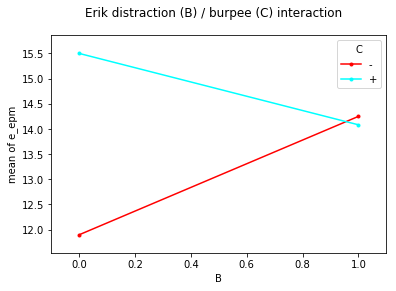

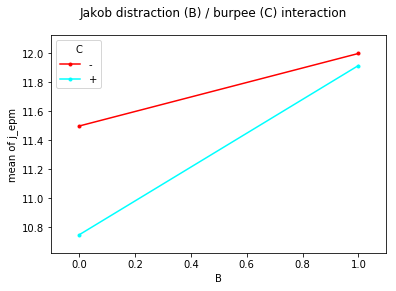

In [27]:
b_series = factor_df['B'].map(lambda x: 0 if x == '-' else 1).astype('float')
b_series.index = list(range(0,16))
fig2 = interaction_plot(b_series, factor_df['C'], factor_df['e_epm'])
fig2.suptitle('Erik distraction (B) / burpee (C) interaction')
plt.show()

b_series_j = factor_df['B'].map(lambda x: 0 if x == '-' else 1).astype('float')
b_series_j.index = list(range(0,16))
fig_j = interaction_plot(b_series_j, factor_df['C'], factor_df['j_epm'])
fig_j.suptitle('Jakob distraction (B) / burpee (C) interaction')
plt.show()

# UPCOMING: ANOVAS AND PREDICTION

* Assign linear model
* Test it using statsmodels F-test

In [39]:
jakob_wpm_model = ols('j_wpm ~ C + A', factor_df).fit()
print(jakob_wpm_model.summary())

jakob_wpm_model_extended = ols('j_wpm ~ C + A + B', factor_df).fit()

                            OLS Regression Results                            
Dep. Variable:                  j_wpm   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     17.64
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           0.000198
Time:                        17:35:49   Log-Likelihood:                -41.733
No. Observations:                  16   AIC:                             89.47
Df Residuals:                      13   BIC:                             91.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.2894      1.578     40.740      0.0

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


## Is the model significant?

In [69]:
def print_results_for_model(df, model_string):
    print('Investigating model: {}'.format(model_string))
    model = ols(model_string, df).fit()
    print(model.params)
    anova_res = model.f_test(model.params).pvalue
    print('ANOVA p-value: {}'.format(anova_res))
    return model

j_wpm_mod = print_results_for_model(factor_df, 'j_wpm ~ A + B + C')
print('---')
erik_epm_model = print_results_for_model(factor_df, 'e_epm ~ A + B + BC')
print('---')
erik_wpm_model = print_results_for_model(factor_df, 'e_wpm ~ A')

# sm.graphics.plot_partregress(j_wpm_mod)


Investigating model: j_wpm ~ A + B + C
Intercept    66.27875
A[T.+]        8.89375
B[T.+]       -3.97875
C[T.+]       -6.16875
dtype: float64
ANOVA p-value: 1.1797247659233358e-14
---
Investigating model: e_epm ~ A + B + BC
Intercept    16.4375
A[T.+]        3.9375
B[T.+]       -0.8125
BC[T.-]      -8.6875
dtype: float64
ANOVA p-value: 2.440665194914714e-09
---
Investigating model: e_wpm ~ A
Intercept    35.14375
A[T.+]        7.97625
dtype: float64
ANOVA p-value: 1.6154844491266806e-14


Interesting examples for regression plots: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/example_regression_plots.html

## Outlier testing

Seems to indicate that I had an error-wise outlier in the last run, writing 3 wpm faster than expected - seems likely. Also indicates that Erik's first run had an abnormally low number of errors (almost four points lower!).



In [63]:
print(jakob_wpm_model.outlier_test())

      student_resid   unadj_p   bonf(p)
Run                                    
7.0       -0.208952  0.837991  1.000000
1.0       -1.276191  0.226035  1.000000
4.0       -0.600544  0.559315  1.000000
13.0      -0.126031  0.901794  1.000000
5.0        1.192646  0.256058  1.000000
8.0        0.889878  0.391023  1.000000
11.0      -0.143253  0.888467  1.000000
14.0       0.587180  0.567967  1.000000
3.0       -1.002702  0.335796  1.000000
15.0      -1.037908  0.319775  1.000000
10.0      -1.605583  0.134344  1.000000
9.0        0.102229  0.920264  1.000000
6.0        1.234398  0.240682  1.000000
2.0       -0.191683  0.851196  1.000000
12.0      -0.213731  0.834345  1.000000
16.0       2.964324  0.011825  0.189204


In [68]:
print(erik_epm_model.outlier_test())

      student_resid   unadj_p   bonf(p)
Run                                    
7.0       -3.724666  0.003354  0.053671
1.0        0.748767  0.469706  1.000000
4.0        0.580288  0.573415  1.000000
13.0      -0.127117  0.901142  1.000000
5.0        0.416062  0.685367  1.000000
8.0        0.852490  0.412119  1.000000
11.0      -0.222792  0.827780  1.000000
14.0       0.127117  0.901142  1.000000
3.0       -0.994590  0.341311  1.000000
15.0       0.817667  0.430902  1.000000
10.0      -0.319024  0.755684  1.000000
9.0        1.627085  0.131998  1.000000
6.0        1.256454  0.234979  1.000000
2.0       -0.286870  0.779544  1.000000
12.0      -1.030889  0.324727  1.000000
16.0      -0.748767  0.469706  1.000000


In [70]:
print(erik_wpm_model.outlier_test())

      student_resid   unadj_p   bonf(p)
Run                                    
7.0       -1.886133  0.081816  1.000000
1.0       -0.608084  0.553608  1.000000
4.0        0.263511  0.796287  1.000000
13.0      -3.065853  0.009021  0.144329
5.0        0.271229  0.790474  1.000000
8.0        0.468284  0.647336  1.000000
11.0      -0.172107  0.866004  1.000000
14.0      -0.936871  0.365905  1.000000
3.0        0.278951  0.784671  1.000000
15.0       1.448029  0.171295  1.000000
10.0      -0.367727  0.718994  1.000000
9.0        0.334730  0.743168  1.000000
6.0        0.273803  0.788538  1.000000
2.0        0.737022  0.474201  1.000000
12.0       0.845528  0.413108  1.000000
16.0       1.369092  0.194161  1.000000
